<a href="https://colab.research.google.com/github/LeeSeungYun1020/Machine_Learning/blob/main/colab/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#손으로 쓴 숫자 이미지

* TPE
 * T: 숫자 분류
 * P: 정확도
 * E: 손으로 쓴 숫자 이미지(MNIST)

* 순서
 * 1. 데이터를 불러온다.
 * 2. 데이터를 확인한다.
 * 3. 데이터를 전처리한다.
 * 4. 머신러닝 알고리즘에 적합하도록 데이터를 준비한다.
 * 5. 머신러닝 알고리즘을 적용한다.
 * 6. 머신러닝 알고리즘을 확인한다.
 * 7. 머신러닝 알고리즘을 개선한다.
 * 8. 원하는 결과가 나올 때까지 1~7을 반복한다.

## Digits를 사용해서 선형 분류를 진행

In [2]:
# 데이터를 불러온다.
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# 데이터 확인
print(f"Image Data Shape: {digits.data.shape}")
print(f"Image Label Shape: {digits.target.shape}")

Image Data Shape: (1797, 64)
Image Label Shape: (1797,)


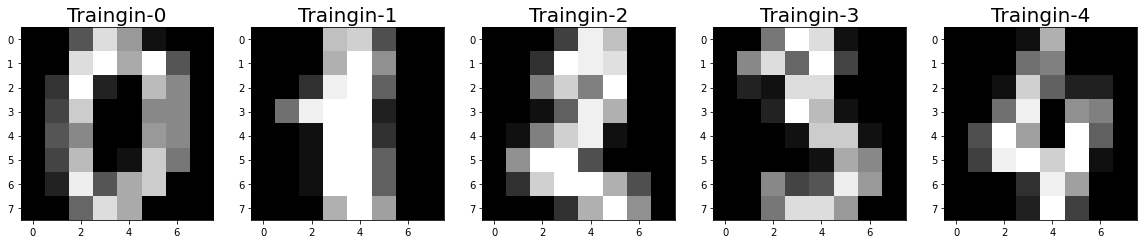

In [13]:
# 데이터 확인 - 시각화
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.data[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
  plt.title(f"Traingin-{index}", fontsize=20)

In [ ]:
# 데이터 전처리
# scikit-learn의 데이터는 이미 전처리가 되어있다...

In [18]:
# 머신러닝 알고리즘에 적합하도록 데이터 준비
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=82)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (1257, 64)
y_train shape (1257,)
x_test shape (540, 64)
y_test shape (540,)


In [26]:
# 머신러닝 알고리즘 적용
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict: 2
Ans: 2


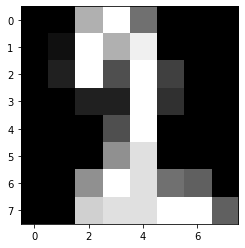

In [32]:
# 머신러닝 알고리즘 평가
print(f"Predict: {model.predict(x_test[0].reshape(1, -1))[0]}")
print(f"Ans: {y_test[0]}")
plt.imshow(np.reshape(x_test[0], (8, 8)), plt.cm.gray)

In [31]:
score = model.score(x_test, y_test)
print(f"Score: {score}")

Score: 0.9574074074074074


## MNIST를 사용하여 선형 분류 진행

In [34]:
# 데이터 불러오기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [36]:
# 데이터 확인
print(mnist.url)
print(f"Image Data Shape: {mnist.data.shape}")
print(f"Image Label Shape: {mnist.target.shape}")

https://www.openml.org/d/554
Image Data Shape: (70000, 784)
Image Label Shape: (70000,)


In [38]:
np.power(784, 1/2)

28.0

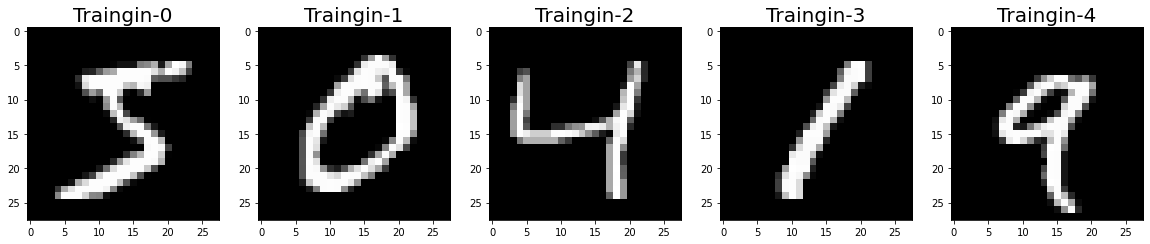

In [39]:
# 데이터 전처리
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.data[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
  plt.title(f"Traingin-{index}", fontsize=20)

In [40]:
# 머신러닝 알고리즘에 적합하도록 데이터 준비
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=82)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (49000, 784)
y_train shape (49000,)
x_test shape (21000, 784)
y_test shape (21000,)


In [41]:
# 머신러닝 알고리즘 적용
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)
# 엄청 오래 걸림

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict: 6
Ans: 6
Score: 0.9133809523809524


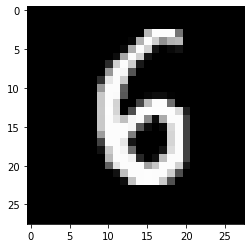

In [43]:
# 머신러닝 알고리즘 평가
print(f"Predict: {model.predict(x_test[0].reshape(1, -1))[0]}")
print(f"Ans: {y_test[0]}")
plt.imshow(np.reshape(x_test[0], (28, 28)), plt.cm.gray)
score = model.score(x_test, y_test)
print(f"Score: {score}")

In [66]:
predictions = model.predict(x_test)
misclassficationIndexes = []
for index, (label, predict) in enumerate(zip(y_test, predictions)):
  if label != predict:
    misclassficationIndexes.append(index)

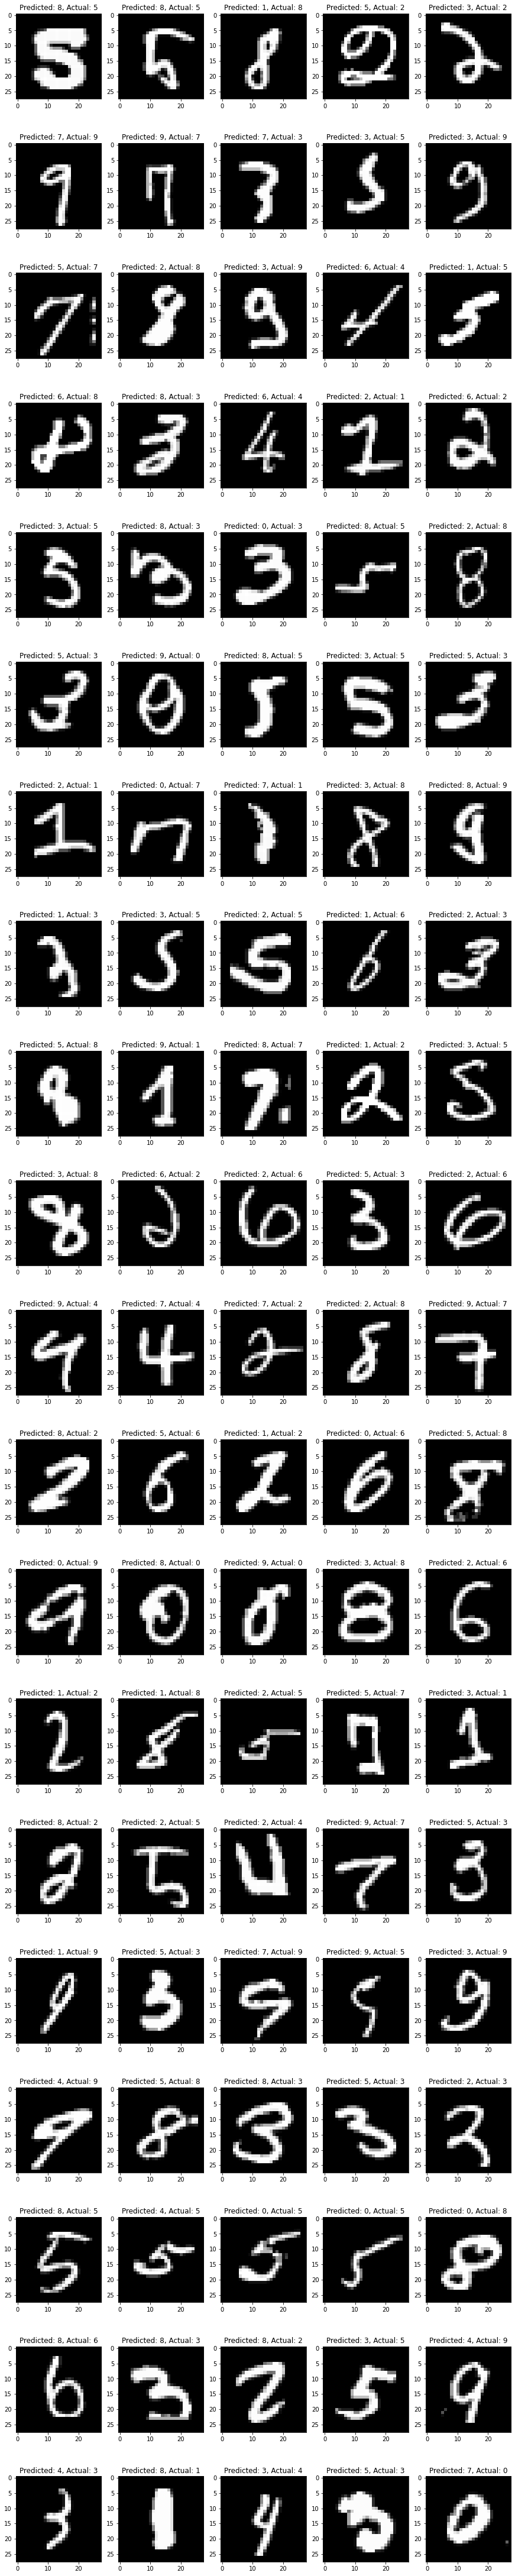

In [67]:
misclassficationIndexes = misclassficationIndexes[:100]
height = len(misclassficationIndexes) // 5 + 1
plt.figure(figsize=(15, 4 * height))
for plotIndex, badIndex in enumerate(misclassficationIndexes):
  plt.subplot(height, 5, plotIndex + 1)
  plt.imshow(np.reshape(x_test[badIndex], (28, 28)), cmap=plt.cm.gray)
  plt.title(f"Predicted: {predictions[badIndex]}, Actual: {y_test[badIndex]}", fontsize=12)